In [1]:
import numpy as np
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

In [2]:
X1 = np.random.normal([1, 10], 0.05, size=(2, 2))
y1 = np.zeros(2)
X2 = np.random.normal([3, 5], 0.01, size=(3, 2))
y2 = np.ones(3)

X = np.vstack([X1, X2])
y = np.concatenate([y1, y2])

index = np.arange(5)
np.random.shuffle(index)
X = X[index]
y = y[index]

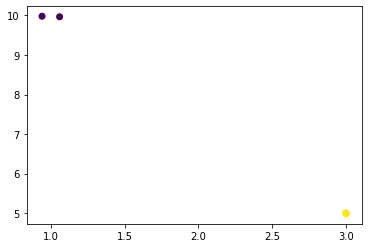

In [3]:
plt.scatter(*X.T, c=y)

In [4]:
X.shape

(5, 2)

# Mountain

## First step
* forming a grid the data space
* where the intersections of the grid lines constitute the candidates for cluster centers, denoted as a set $V$

In [5]:
x_min, y_min = X.min(axis=0)
x_max, y_max = X.max(axis=0)

xx = np.linspace(x_min, x_max, 10)
yy = np.linspace(y_min, y_max, 10)

V = np.stack(np.meshgrid(xx, yy))

In [6]:
X.shape, V.shape

((5, 2), (2, 10, 10))

In [7]:
(X[0] * V[:, 0, 0]).sum()

50.58766547843018

In [8]:
X.shape
V.shape

(2, 10, 10)

In [9]:
V = np.stack(V)[np.newaxis, ...]
X = np.expand_dims(X, axis=list(range(2, len(V.shape))))

In [10]:
X.shape

(5, 2, 1, 1)

In [15]:
X.shape, V.shape

((5, 2, 1, 1), (1, 2, 10, 10))

In [12]:
points_norm = np.linalg.norm(X, ord=2, axis=1)
grid_norm = np.linalg.norm(V, ord=2, axis=1)

In [19]:
gt = metrics.pairwise.cosine_similarity(X.squeeze(), V.squeeze().reshape(2, 100).T)

In [17]:
value = (X * V).sum(axis=1) / (points_norm * grid_norm)

In [22]:
gt - value.reshape(5, -1)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.11022302e-16, -1.11022302e-16,
         0.00000000e+00,  1.11022302e-16,  0.00000000e+00,
        -1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         1.11022302e-16,  1.11022302e-16,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.11022302e-16,  1.11022302e-16,  0.00000000e+00,
        -1.11022302e-16,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.11022302e-16, -1.11022302e-16,
         0.00000000e+00,  0.00000000e+00, -1.11022302e-16,
         0.00000000e+00, -1.11022302e-16,  0.00000000e+00,
         0.00000000e+00,  1.11022302e-16,  1.11022302e-16,
         1.11022302e-16,  0.00000000e+00,  1.11022302e-16,
         1.11022302e-16,  1.11022302e-16,  1.11022302e-16,
         2.22044605e-16,  1.11022302e-16,  0.00000000e+0

In [10]:
V # : Array[1, n_dims, x_dims, y_dims]

array([[[[ 0.98240685,  1.20748015,  1.43255346,  1.65762676,
           1.88270006,  2.10777336,  2.33284667,  2.55791997,
           2.78299327,  3.00806657],
         [ 0.98240685,  1.20748015,  1.43255346,  1.65762676,
           1.88270006,  2.10777336,  2.33284667,  2.55791997,
           2.78299327,  3.00806657],
         [ 0.98240685,  1.20748015,  1.43255346,  1.65762676,
           1.88270006,  2.10777336,  2.33284667,  2.55791997,
           2.78299327,  3.00806657],
         [ 0.98240685,  1.20748015,  1.43255346,  1.65762676,
           1.88270006,  2.10777336,  2.33284667,  2.55791997,
           2.78299327,  3.00806657],
         [ 0.98240685,  1.20748015,  1.43255346,  1.65762676,
           1.88270006,  2.10777336,  2.33284667,  2.55791997,
           2.78299327,  3.00806657],
         [ 0.98240685,  1.20748015,  1.43255346,  1.65762676,
           1.88270006,  2.10777336,  2.33284667,  2.55791997,
           2.78299327,  3.00806657],
         [ 0.98240685,  1.20748015

## Second step
* constructing a mountain function representing a data density measure

In [11]:
def mountain_function(v, x, norm, sigma):
    """
    Inputs:
        v : Array[1, n_dims, x_dims, y_dims]
        Mountain points
        x : Array[n_samples, n_dims, x_dims, y_dims]
        Data points
        norm: Funct
        
        sigma: float
    
    """
    return np.exp(-norm((V - X), axis=1) / (2 * sigma ** 2)).sum(axis=0)

In [12]:
mountain_function(
    V, X, 
    lambda x, **kwargs: np.linalg.norm(x, ord=2, **kwargs),
    0.1
).shape

(10, 10)

In [13]:
m = lambda v: mountain_function(
    v,
    X,
    lambda y, **kwargs: np.linalg.norm(y, ord=2, **kwargs),
    0.1
)

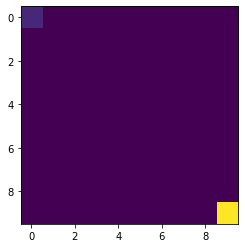

In [14]:
m_V = m(V)
plt.imshow(m_V[::-1])

In [15]:
np.unravel_index(np.argmax(m(V)), m(V).shape)

(0, 9)

In [16]:
m(V).shape

(10, 10)

In [17]:
C1_idx = np.where(m(V) == m(V).max())
C1_idx
print(C1_idx)
C1 = V[(0, range(len(C1_idx)), *C1_idx)]

(array([0]), array([9]))


In [18]:
V[0].shape

(2, 10, 10)

In [19]:
_C1 = np.expand_dims(C1, axis=list(range(1, len(V[0].shape))))[np.newaxis, ...]

In [20]:
_C1.shape

(1, 2, 1, 1)

## Third step
* Selecting the cluster centers by sequentially destructing the mountain function

In [21]:
def m_update(V, C1, beta):
    C1_mass = np.exp(
        - np.linalg.norm(
            V[0] - C1.reshape(-1, 1, 1),
            ord=2, axis=0
        ) / (2 * beta ** 2)
    )
    
    print(m(V).shape, np.linalg.norm(m(C1) - C1_mass))
    
    return m(V) - m(C1) * C1_mass

In [22]:
m_new = m_update(V, C1, 0.1)

def new_cluster(m_new, V):
    Cnew_idx = np.where(m_new == m_new.max())
    Cnew = V[(0, [0, 1], *Cnew_idx)]
    return Cnew

Cnew = new_cluster(m_new, V)

#np.testing.assert_array_equal(Cnew, np.array([1, 10])) # Expected [1, 10] as is the mean of the other gaussian

(10, 10) 0.6780258402435275


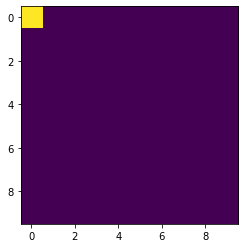

In [23]:
plt.imshow(m_new[::-1])

In [24]:
m_new = m_update(V, C1, 0.1)

(10, 10) 0.6780258402435275


In [25]:
Cnew.shape

(2,)

In [26]:
np.stack([np.ones(2) for _ in range(3)]).shape

(3, 2)

# Question
* Stop criterio?
 + " continues until a sufficient number of cluster centers is attained."